##Importing the libraries used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

## Importing the data

In [ ]:
col_names = ["lever_pos", "ship_speed", "gt_shaft_tor", "gt_rate_rev", "gg_rate_rev", "starboard_prop_tor", "port_prop_tor",
             "hp_turb_exit_temp", "gt_comp_inlet_air_temp", "gt_comp_outlet_air_temp", "hp_exit_turb_pres", "gt_comp_inlet_air_pres",
             "gt_comp_outlet_air_pres","gt_exh_gas_pres", "tic", "fuel_flow", "gt_comp_decay_state_coef", "gt_turb_decay_state_coef"]

In [ ]:
col_names

['lever_pos',
 'ship_speed',
 'gt_shaft_tor',
 'gt_rate_rev',
 'gg_rate_rev',
 'starboard_prop_tor',
 'port_prop_tor',
 'hp_turb_exit_temp',
 'gt_comp_inlet_air_temp',
 'gt_comp_outlet_air_temp',
 'hp_exit_turb_pres',
 'gt_comp_inlet_air_pres',
 'gt_comp_outlet_air_pres',
 'gt_exh_gas_pres',
 'tic',
 'fuel_flow',
 'gt_comp_decay_state_coef',
 'gt_turb_decay_state_coef']

Import the dataset on your Google drive connected to Colab

In [ ]:
#for importing from google drive
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/UCI CBM Dataset/data.txt"
data = pd.read_csv(path, delimiter = "   ", header = None, names = col_names)
# Dataset is now stored in a Pandas Dataframe

Mounted at /content/drive


<ipython-input-5-8896868b8d40>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, delimiter = "   ", header = None, names = col_names)


In [ ]:
data.head()

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_inlet_air_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_inlet_air_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow,gt_comp_decay_state_coef,gt_turb_decay_state_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


## Exploratory Data Analysis

In [ ]:
data.isna().sum()/len(data)

lever_pos                   0.0
ship_speed                  0.0
gt_shaft_tor                0.0
gt_rate_rev                 0.0
gg_rate_rev                 0.0
starboard_prop_tor          0.0
port_prop_tor               0.0
hp_turb_exit_temp           0.0
gt_comp_inlet_air_temp      0.0
gt_comp_outlet_air_temp     0.0
hp_exit_turb_pres           0.0
gt_comp_inlet_air_pres      0.0
gt_comp_outlet_air_pres     0.0
gt_exh_gas_pres             0.0
tic                         0.0
fuel_flow                   0.0
gt_comp_decay_state_coef    0.0
gt_turb_decay_state_coef    0.0
dtype: float64

In [ ]:
data.describe()

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_inlet_air_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_inlet_air_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow,gt_comp_decay_state_coef,gt_turb_decay_state_coef
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lever_pos                 11934 non-null  float64
 1   ship_speed                11934 non-null  float64
 2   gt_shaft_tor              11934 non-null  float64
 3   gt_rate_rev               11934 non-null  float64
 4   gg_rate_rev               11934 non-null  float64
 5   starboard_prop_tor        11934 non-null  float64
 6   port_prop_tor             11934 non-null  float64
 7   hp_turb_exit_temp         11934 non-null  float64
 8   gt_comp_inlet_air_temp    11934 non-null  float64
 9   gt_comp_outlet_air_temp   11934 non-null  float64
 10  hp_exit_turb_pres         11934 non-null  float64
 11  gt_comp_inlet_air_pres    11934 non-null  float64
 12  gt_comp_outlet_air_pres   11934 non-null  float64
 13  gt_exh_gas_pres           11934 non-null  float64
 14  tic   

In [ ]:
data.shape

(11934, 18)

In [ ]:
for col in data:
  print(col, len(data[col].unique()))

lever_pos 9
ship_speed 9
gt_shaft_tor 11430
gt_rate_rev 3888
gg_rate_rev 11834
starboard_prop_tor 4286
port_prop_tor 4286
hp_turb_exit_temp 11772
gt_comp_inlet_air_temp 1
gt_comp_outlet_air_temp 11506
hp_exit_turb_pres 524
gt_comp_inlet_air_pres 1
gt_comp_outlet_air_pres 4209
gt_exh_gas_pres 19
tic 8496
fuel_flow 696
gt_comp_decay_state_coef 51
gt_turb_decay_state_coef 26


## Visualising the relationship

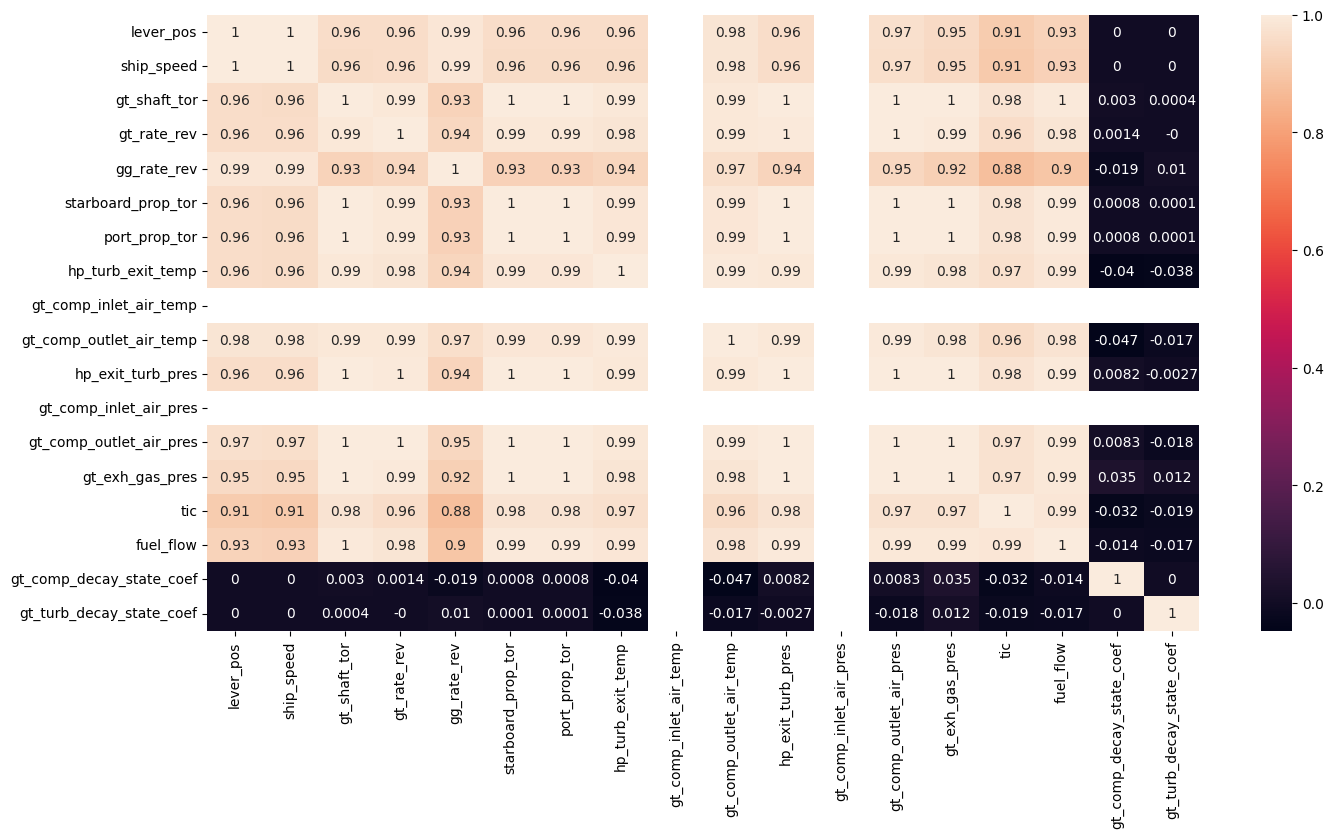

In [ ]:
corr_mat= np.round(data.corr(),4)
plt.figure(figsize = (16,8))
sns.heatmap(corr_mat, annot = True)
plt.show()

<ipython-input-13-b190fdecc403>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-13-b190fdecc403>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-13-b190fdecc403>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

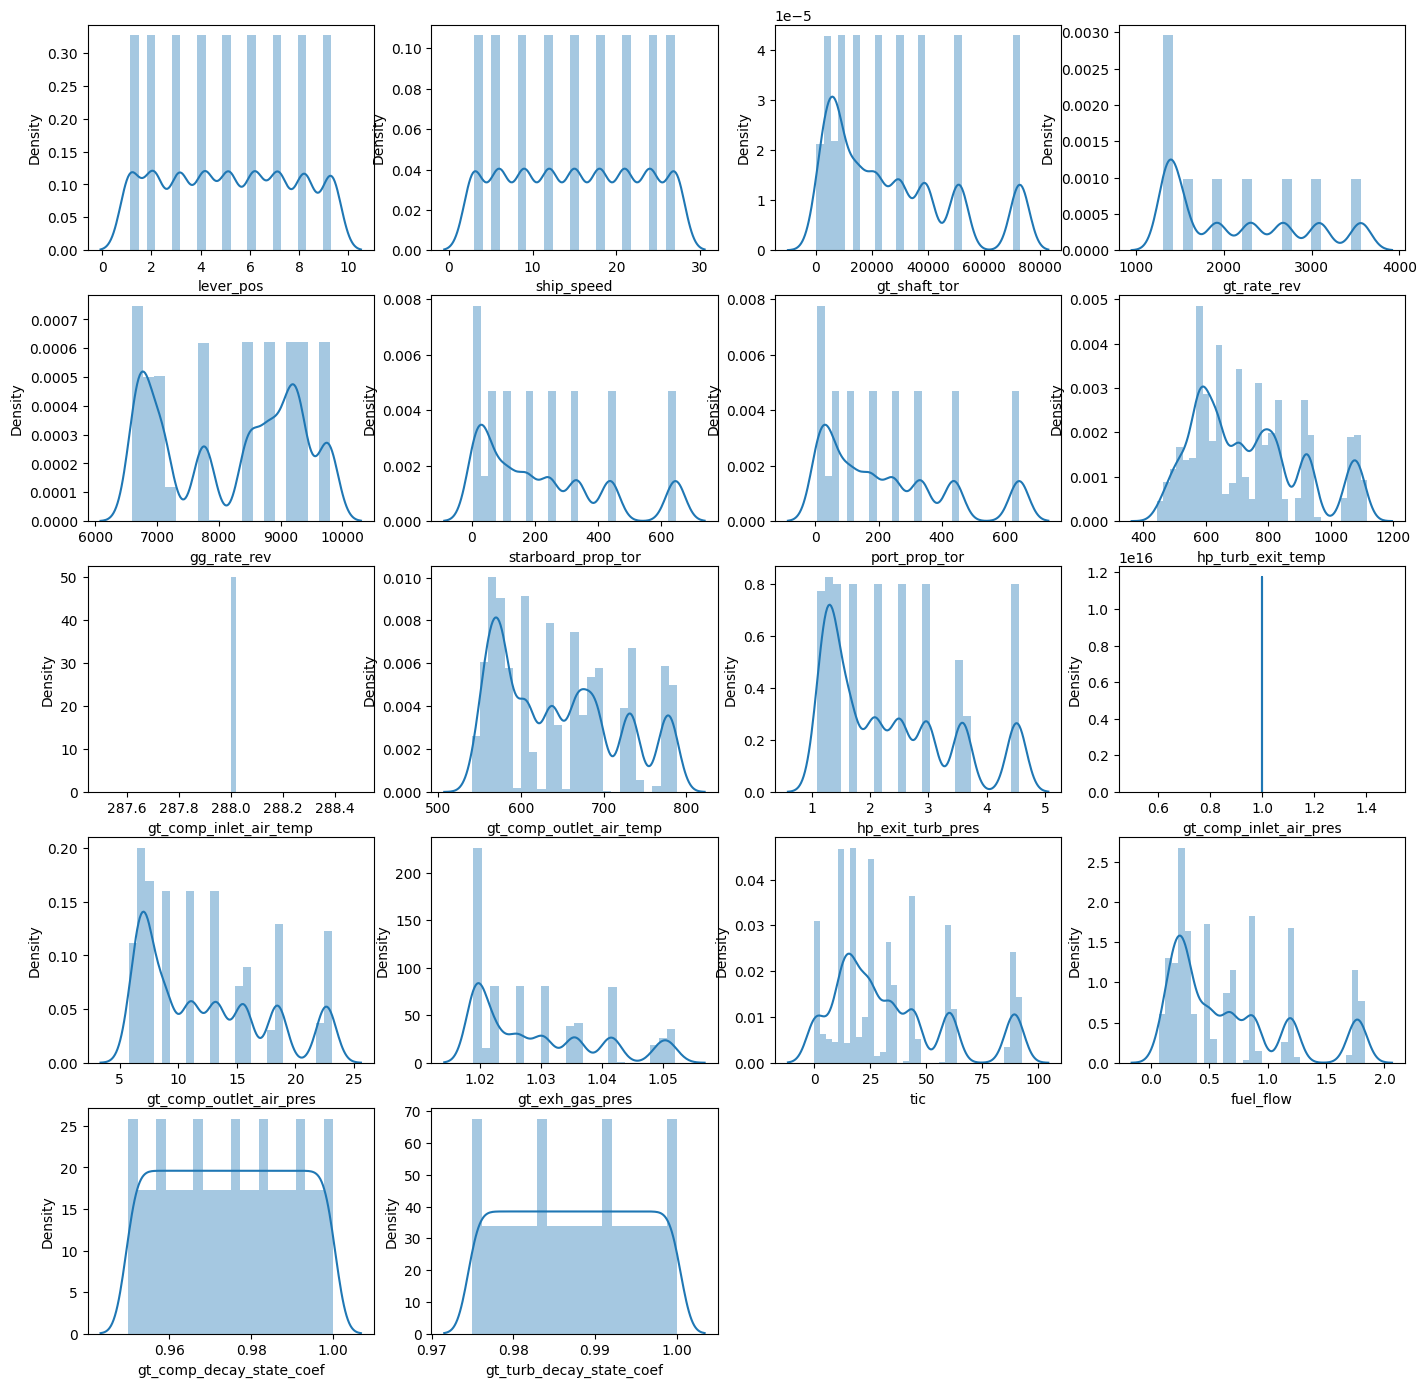

In [ ]:
plt.figure(figsize=(17,17))
icount =1
for col in data.columns:
    plt.subplot(5,4, icount)
    sns.distplot(data[col])
    icount +=1
plt.show()

## Preparing the data for machine learning model - Preprocessing

Dropping the columns that have 1 unique value, i.e. have constant values for all the input.

In [ ]:
data = data.drop('gt_comp_inlet_air_temp', axis = 1)
data = data.drop('gt_comp_inlet_air_pres', axis = 1)

In [ ]:
data.head()

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow,gt_comp_decay_state_coef,gt_turb_decay_state_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


Separating the data into X and Y datasets based on the features and value that is to be predicted.

In [ ]:
X = data[['lever_pos', 'ship_speed', 'gt_shaft_tor', 'gt_rate_rev', 'gg_rate_rev', 'starboard_prop_tor', 'port_prop_tor', 'hp_turb_exit_temp', 'gt_comp_outlet_air_temp',
          'hp_exit_turb_pres', 'gt_comp_outlet_air_pres', 'gt_exh_gas_pres', 'tic', 'fuel_flow']]
Y1 = data['gt_turb_decay_state_coef']
y = pd.DataFrame([Y1]).transpose()

In [ ]:
X.head()

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522


In [ ]:
y.head()

,gt_turb_decay_state_coef
0,0.975
1,0.975
2,0.975
3,0.975
4,0.975


Splitting the X,y data into training and testing using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [ ]:
X_train

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow
3685,5.140,15.0,21634.909,1924.339,8497.497,175.278,175.278,704.972,638.429,2.078,11.004,1.026,24.951,0.494
5886,1.138,3.0,2706.698,1327.031,6622.351,6.270,6.270,545.800,557.982,1.184,6.450,1.019,26.222,0.194
6108,7.148,21.0,38998.248,2678.048,9120.644,332.275,332.275,835.034,691.451,2.980,15.730,1.035,44.789,0.887
7713,1.138,3.0,6763.006,1382.569,6697.636,9.375,9.375,620.925,570.351,1.322,7.078,1.019,0.000,0.278
3499,8.206,24.0,50994.067,3087.521,9319.460,438.106,438.106,917.854,733.407,3.566,18.180,1.041,59.577,1.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8.206,24.0,50989.676,3087.293,9292.800,437.925,437.925,915.018,725.973,3.607,18.693,1.042,60.083,1.189
5191,8.206,24.0,50993.686,3087.472,9306.729,438.021,438.021,933.160,734.056,3.589,18.621,1.041,61.190,1.211
5390,9.300,27.0,72759.686,3560.371,9751.200,644.872,644.872,1089.292,780.775,4.526,22.961,1.050,90.760,1.797
860,6.175,18.0,29797.053,2307.255,8842.649,246.362,246.362,779.989,671.876,2.497,13.129,1.030,34.453,0.682


In [ ]:
X_test

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow
10172,3.144,9.0,8375.164,1386.735,7045.840,60.311,60.311,576.879,576.548,1.392,7.506,1.021,11.961,0.237
10322,9.300,27.0,72757.002,3560.349,9728.709,644.795,644.795,1064.615,773.249,4.550,23.045,1.051,88.928,1.760
9195,7.148,21.0,39005.631,2678.023,9117.010,332.339,332.339,821.362,686.661,2.986,15.687,1.036,43.923,0.870
357,7.148,21.0,38977.552,2678.076,9138.462,332.109,332.109,840.619,697.393,2.956,15.460,1.035,44.791,0.887
4352,6.175,18.0,29792.145,2307.399,8824.273,246.206,246.206,774.265,668.631,2.503,13.185,1.030,34.208,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7388,9.300,27.0,72770.244,3560.403,9754.242,644.774,644.774,1068.077,775.818,4.520,22.632,1.051,88.646,1.755
7176,4.161,12.0,14720.833,1547.459,7757.985,113.763,113.763,632.714,604.558,1.660,8.882,1.023,16.839,0.333
5721,7.148,21.0,38992.234,2678.070,9126.158,332.272,332.272,827.086,690.517,2.973,15.569,1.035,44.125,0.874
267,7.148,21.0,38981.591,2678.088,9133.424,332.071,332.071,850.929,699.107,2.962,15.630,1.035,45.600,0.903


Converting Training and Testing dataset of Pandas dataframe type to numpy arrays

In [ ]:
X_train = (X_train.values).astype(np.float32)
y_train = (y_train.values).astype(np.float32)
X_test = (X_test.values).astype(np.float32)
y_test = (y_test.values).astype(np.float32)

In [ ]:
print(X_train.shape)

(9547, 14)


In [ ]:
X.describe()

,lever_pos,ship_speed,gt_shaft_tor,gt_rate_rev,gg_rate_rev,starboard_prop_tor,port_prop_tor,hp_turb_exit_temp,gt_comp_outlet_air_temp,hp_exit_turb_pres,gt_comp_outlet_air_pres,gt_exh_gas_pres,tic,fuel_flow
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,646.215331,2.352963,12.297123,1.029474,33.641261,0.662440
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,72.675882,1.084770,5.337448,0.010390,25.841363,0.507132
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,540.442000,1.093000,5.828000,1.019000,0.000000,0.068000
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,578.092250,1.389000,7.447250,1.020000,13.677500,0.246000
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,637.141500,2.083000,11.092000,1.026000,25.276500,0.496000
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,693.924500,2.981000,15.658000,1.036000,44.552500,0.882000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,789.094000,4.560000,23.140000,1.052000,92.556000,1.832000


Feature scaling the training and testing data set, using standardscaler(standardization) from Sklearn


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train_std)
X_train_2D_pca = pca2.transform(X_train_std)
print(f'PCA Features: Number of samples and attributes: {X_train_2D_pca.shape}')


PCA Features: Number of samples and attributes: (9547, 2)


In [ ]:
X_train_2D_pca[0:,0]
X_train_2D_pca[0:,1]

array([-0.5774321 ,  0.97300905, -0.44290632, ...,  0.82107306,
       -0.5755946 , -0.05708499], dtype=float32)

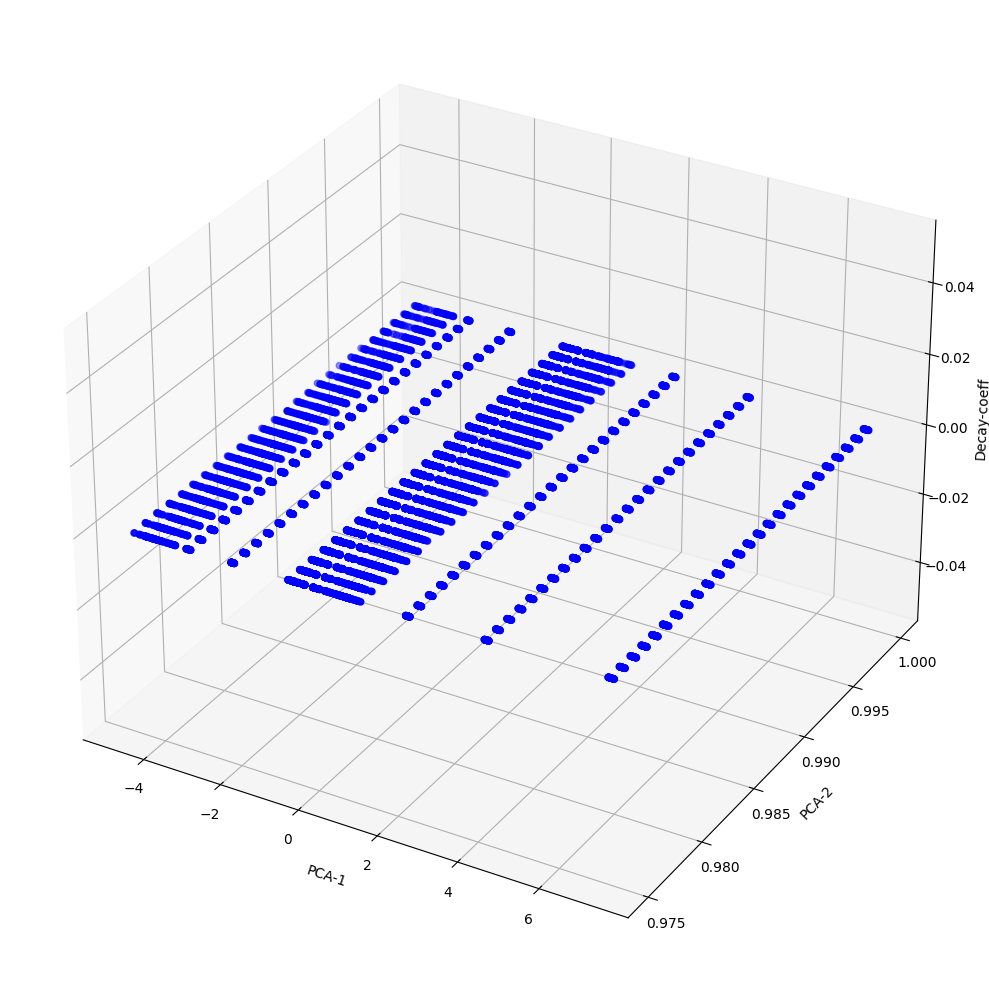

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')


ax.scatter(X_train_2D_pca[:,0], y_train,color="b")
ax.scatter(X_train_2D_pca[:,1], y_train,color="b")

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Decay-coeff")

plt.tight_layout()
plt.show()

## Using the LinearRegression class from sklearn

Comparing R^2 values of training data set before and after standard feature scaling

In [ ]:
from sklearn.linear_model import LinearRegression

model_linearRegression = LinearRegression()

model_linearRegression.fit(X_train, y_train)

r2_Score = model_linearRegression.score(X_test, y_test)

print(r2_Score)

0.9103353694970224


In [ ]:
from sklearn.linear_model import LinearRegression

model_linearRegression_f = LinearRegression()

model_linearRegression_f.fit(X_train_std, y_train)

r2_Score_f = model_linearRegression_f.score(X_test_std, y_test)

print(r2_Score_f)

0.9117920111835827


In [ ]:
r2_Score_f - r2_Score

0.0014566416865602339

In [ ]:
print(model_linearRegression_f.intercept_)
print(model_linearRegression_f.coef_)

[0.98753005]
[[ 0.00057252  0.04748426  0.30803096  0.05054456  0.03456148 -0.15961012
  -0.15961003 -0.11913061  0.01358455  0.08895809 -0.28743982  0.00948911
  -0.00614601  0.18259192]]


$$ \hat y = 0.987 + 0.00572x_1 + 0.047488x_2 +0.308x_3 + 0.0505x_4 + 0.03456x_5 - 0.15961x_6 -0.15961x_7 - 0.11913x_8 + 0.01358x_9 - 0.0889x_{10} -0.2874x_{11} - 0.00299x_{12} - 0.0061x_{13} + 0.1825x_{14}$$


### Polyomial Regression using Sklearn

$$ \hat y = θ_0 + \theta_1x + \theta_2x^2 + ... + \theta_nx^n$$

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
# Fit linear regression on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
print(X_poly_train[0])

[5.1399999e+00 1.5000000e+01 2.1634908e+04 ... 1.5192520e+02 3.0079372e+00
 5.9553564e-02]


In [ ]:
X_poly = poly_features.transform(X)
X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)
X_test_poly_std = poly_features.transform(X_test_std)
y_pred_poly_std = poly_reg.predict(X_test_poly_std)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [ ]:
r2_Score_poly = poly_reg.score(X_test_poly, y_test)
print(r2_Score_poly)

0.7451001060563811


In [ ]:
r2_Score_poly_std = poly_reg.score(X_test_poly_std, y_test)
print(r2_Score_poly_std)

-413.2536612755576


#### Plotting graph using PCA

In [ ]:
pca2.fit(X_test_poly)
X_test_2D_poly = pca2.transform(X_test_poly)
print(f'PCA Features: Number of samples and attributes: {X_test_2D_poly.shape}')

PCA Features: Number of samples and attributes: (2387, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:633: RuntimeWarning: overflow encountered in square
  self.explained_variance_ = (S**2) / (n_samples - 1)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:638: RuntimeWarning: overflow encountered in square
  np.square(X, out=X)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:646: RuntimeWarning: invalid value encountered in float_scalars
  self.noise_variance_ = total_var - self.explained_variance_.sum()


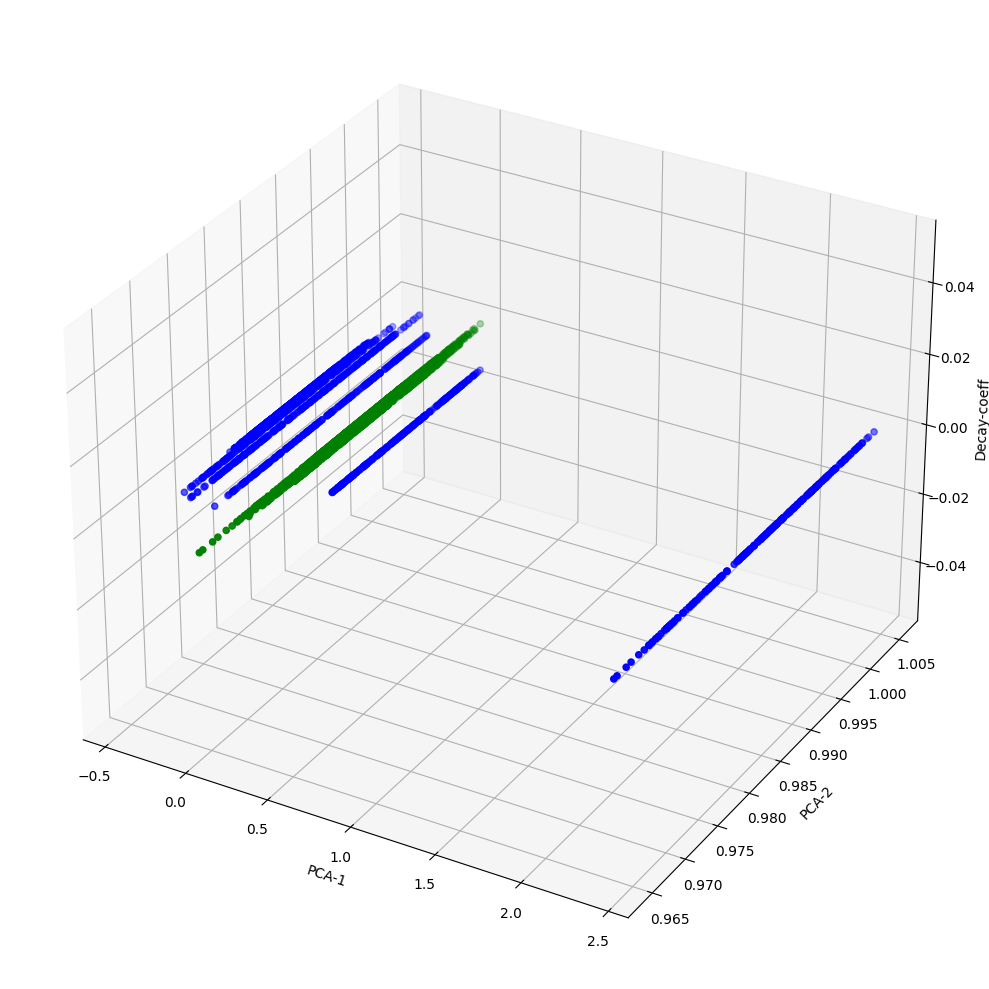

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')


ax.scatter(X_test_2D_poly[:,0], y_pred_poly,color="b")
ax.scatter(X_test_2D_poly[:,1], y_pred_poly, color="g")

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Decay-coeff")

plt.tight_layout()
plt.show()

##Regularization

In [ ]:
# L1 - Regularization - Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

r2_Score_l1 = lasso_reg.score(X_test, y_test)
print(r2_Score_l1)

-0.0004868820033103738


In [ ]:
lasso_reg.fit(X_train_std, y_train)
r2_Score_l1_std = lasso_reg.score(X_test_std, y_test)
print(r2_Score_l1_std)

-0.0003974504399268941


In [ ]:
# L2-Regularization - Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

r2_Score_l2 = ridge_reg.score(X_test, y_test)
print(r2_Score_l2)

0.9070137716673771


In [ ]:
ridge_reg.fit(X_train_std, y_train)
r2_Score_l2_std = ridge_reg.score(X_test_std, y_test)
print(r2_Score_l2_std)


0.9091554145842407


In [ ]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

r2_Score_en = elastic_net.score(X_test, y_test)
print(r2_Score_en)

0.21145820186828346


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e-01, tolerance: 5.352e-05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
elastic_net.fit(X_train_std, y_train)
r2_Score_en_std = elastic_net.score(X_test_std, y_test)
print(r2_Score_en_std)

-0.0003974504399268941


##SVM Regression

In [ ]:
#Linear SVR
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg.fit(X_train, y_train)

r2_Score_svm = svm_reg.score(X_test, y_test)
print(r2_Score_svm)

-17108.72658439071


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_reg.fit(X_train_std, y_train)
r2_Score_svm_std = svm_reg.score(X_test_std, y_test)
print(r2_Score_svm_std)

-17108.72658439071


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Linear SVR with kernel
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear',epsilon = 0.1)

svr_lin.fit(X_train, y_train)

r2_Score_lin = svr_lin.score(X_test, y_test)
print(r2_Score_lin)

-0.0002546238850065219


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Polynomial SVR
from sklearn.svm import SVR

svr_poly = SVR(kernel='poly', C=1e3, degree = 14)

svr_poly.fit(X_train, y_train)

r2_Score_polysvm = svr_poly.score(X_test, y_test)
print(f'R2 = {r2_Score_poly}')

R2 = 0.7451001060563811


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train_std, y_train)

r2_Score_rbf = svr_rbf.score(X_test, y_test)
print(r2_Score_rbf)

-0.0002546238850065219


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svr_lin.fit(X_train_std, y_train)
svr_poly.fit(X_train_std, y_train)
svr_rbf.fit(X_train_std, y_train)
r2_Score_lin_std = svr_lin.score(X_test_std, y_test)
r2_Score_polysvm_std = svr_poly.score(X_test_std, y_test)
r2_Score_rbf_std = svr_rbf.score(X_test_std, y_test)
print(r2_Score_lin_std,r2_Score_poly_std,r2_Score_rbf_std)

-0.0002546238850065219 -413.2536612755576 -0.0002546238850065219


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We observe that standard scaling doesnt impact the performance of svm regression

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
pca1.fit(X_train_std)
X_train_1D_pca = pca1.transform(X_train_std)
print(f'PCA Features: Number of samples and attributes: {X_train_1D_pca.shape}')

PCA Features: Number of samples and attributes: (9547, 1)


In [ ]:
y_pred_lin_svr = svr_lin.predict(X_train_std)
y_pred_poly_svr = svr_poly.predict(X_train_std)
y_pred_rbf_svr = svr_rbf.predict(X_train_std)

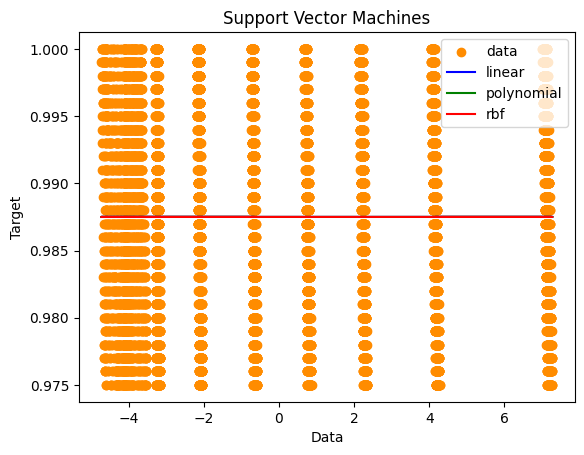

In [ ]:
plt.scatter(X_train_1D_pca[:,0], y_train, color='darkorange', label = 'data')
plt.plot(X_train_1D_pca[:,0], y_pred_lin_svr, color = 'b', label = 'linear')
plt.plot(X_train_1D_pca[:,0], y_pred_poly_svr, color = 'g', label = 'polynomial')
plt.plot(X_train_1D_pca[:,0], y_pred_rbf_svr, color = 'r', label = 'rbf')

plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Support Vector Machines')

plt.legend()
plt.show()

## Cross Validation for all models

In [ ]:
from sklearn.model_selection import cross_val_score
scores_CV = cross_val_score(model_linearRegression_f, X_train_std, y_train, cv=10)
print(scores_CV)

print(scores_CV.mean())
print(scores_CV.std())

[0.90000365 0.91116849 0.91709029 0.91629364 0.91541582 0.91606518
 0.89190719 0.90741458 0.9117259  0.91520909]
0.9102293843593149
0.007879805333431366


Cross Validation score = $$ 0.91 \frac{+}{-} 0.0078 $$

In [ ]:
poly_scores_CV = cross_val_score(poly_reg, X_poly_train, y_train, cv=10)
print(poly_scores_CV)

print(poly_scores_CV.mean())
print(poly_scores_CV.std())

[0.73347978 0.66335103 0.75628423 0.59276328 0.65226737 0.73199077
 0.57320157 0.68312387 0.72125471 0.72551286]
0.6833229465984926
0.059260068352396146


In [ ]:
Ridge_scores_CV = cross_val_score(ridge_reg, X_train_std, y_train, cv=10)
print(Ridge_scores_CV)

print(Ridge_scores_CV.mean())
print(Ridge_scores_CV.std())

[0.89621325 0.90306331 0.91229661 0.91163263 0.91251679 0.91129727
 0.88472556 0.90172697 0.90427033 0.90954759]
0.904729031749605
0.008465176310039905


Cross Validation Score =  $$ 0.904 \frac{+}{-} 0.008 $$

In [ ]:
linsvr_scores_CV = cross_val_score(svr_lin, X_train_std, y_train.ravel(), cv=10)
print(linsvr_scores_CV)

print(linsvr_scores_CV.mean())
print(linsvr_scores_CV.std())

[-3.08710786e-03 -2.10104373e-06 -1.12683802e-03 -1.53593197e-03
 -3.12534332e-04 -1.09760365e-03 -2.73377795e-03 -1.05512676e-03
 -1.47659611e-03 -5.12406071e-03]
-0.0017551678411624084
0.001438003089826842


### Cross Validation on whole dataset

In [ ]:
from sklearn.model_selection import cross_val_score

scores_CVw = cross_val_score(model_linearRegression, X, y, cv=10)

print(scores_CV)

[0.90000365 0.91116849 0.91709029 0.91629364 0.91541582 0.91606518
 0.89190719 0.90741458 0.9117259  0.91520909]


In [ ]:
print(scores_CV.mean())
print(scores_CV.std())

0.9102293843593149
0.007879805333431366


Cross Validation Score =  $$ 0.90 \frac{+}{-} 0.024 $$

In [ ]:
poly_scores_CVw = cross_val_score(poly_reg, X_poly, y, cv=10)
print(poly_scores_CVw)

print(poly_scores_CVw.mean())
print(poly_scores_CVw.std())

[0.99998147 0.99999617 0.99999565 0.99999642 0.99999614 0.99999587
 0.99999644 0.99999714 0.99999653 0.99999352]
0.9999945360062952
4.448409420564749e-06


Cross Validation Score =  $$ 0.99 \frac{+}{-} 0.0004 $$

In [ ]:
Ridge_scores_CVw = cross_val_score(ridge_reg, X, y, cv=10)
print(Ridge_scores_CVw)

print(Ridge_scores_CVw.mean())
print(Ridge_scores_CVw.std())

[0.88819362 0.89174584 0.89387152 0.88513391 0.88654743 0.90429351
 0.93075289 0.94267936 0.91152936 0.87844739]
0.9013194839330538
0.02003193728659032


Cross Validation Score =  $$ 0.901 \frac{+}{-} 0.020 $$

In [ ]:
linsvr_scores_CVw = cross_val_score(svr_lin, X, y, cv=10)
print(linsvr_scores_CVw)

print(linsvr_scores_CVw.mean())
print(linsvr_scores_CVw.std())

[-9.44760202e-04 -5.76882438e-04 -2.93571098e-04 -9.58506799e-05
 -7.64031449e-06 -1.51447556e-05 -1.10692639e-04 -2.87988922e-04
 -5.53565148e-04 -8.77061496e-04]
-0.000376315769182245
0.00032798634189252704


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
tree_reg.score(X_test,y_test)

0.12419847240089343

In [ ]:
cols = ['lever_pos', 'ship_speed', 'gt_shaft_tor', 'gt_rate_rev', 'gg_rate_rev', 'starboard_prop_tor', 'port_prop_tor', 'hp_turb_exit_temp', 'gt_comp_outlet_air_temp',
          'hp_exit_turb_pres', 'gt_comp_outlet_air_pres', 'gt_exh_gas_pres', 'tic', 'fuel_flow']

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree_reg, out_file="Reg_tree.dot",
                feature_names = cols,
                class_names = col_names[17], rounded = True,
                filled = True)

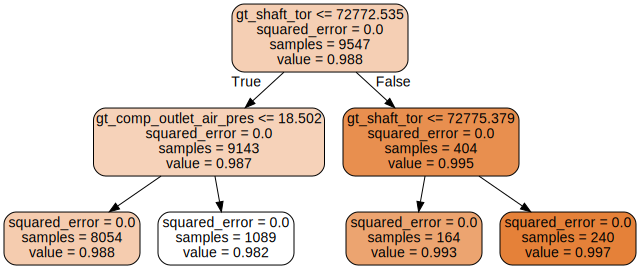

In [ ]:
from graphviz import Source
Source.from_file("Reg_tree.dot")

If the same decision tree is allowed to grow till 20 levels, the results are as follows:

In [ ]:
tree_reg_20 = DecisionTreeRegressor(max_depth = 20)
tree_reg_20.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [ ]:
dt_score  = tree_reg_20.score(X_test, y_test)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 13)

regressor.fit(X_train, y_train)

<ipython-input-70-9be680f24d7b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=13)

In [ ]:
rf_score = regressor.score(X_test,y_test)

In [ ]:
rf_score

0.9930706170979834

###Gradient Boost and Ada Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [ ]:
gbr_score = gbrt.score(X_test,y_test)
print(gbr_score)

0.39452241607564864


In [ ]:
#post standard scaling
gbrt.fit(X_train_std, y_train)
gbr_score_std = gbrt.score(X_test_std, y_test)
print(gbr_score_std)

0.3945224160756483


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adareg = AdaBoostRegressor(random_state= 0, n_estimators = 100, learning_rate = 1.0)
adareg.fit(X_train,y_train.ravel())
adareg_score = adareg.score(X_test, y_test.ravel())
print(adareg_score)

0.15328172146689234


In [ ]:
#post standard scaling
adareg.fit(X_train_std, y_train.ravel())
adareg_score_std = adareg.score(X_test_std, y_test.ravel())
print(adareg_score_std)

0.15251172535018465


##r2 value prescaled and post scaled for all models

In [ ]:
model=['Linear Regression','Polynomial Regression','Lasso Regression','Ridge Regression','Elastic-net Regression', 'LinearSVM Regression','PolynomialSVM Regression','RBF SVM Regression', 'Decision Trees', 'Random Forest Regressor', 'Gradient Boost','Ada Boost']
r2_prestd=[r2_Score, r2_Score_poly, r2_Score_l1, r2_Score_l2, r2_Score_en, r2_Score_lin, r2_Score_polysvm, r2_Score_rbf, dt_score, rf_score, gbr_score, adareg_score]
r2_poststd=[r2_Score_f, r2_Score_poly_std, r2_Score_l1_std, r2_Score_l2_std, r2_Score_en_std, r2_Score_lin_std, r2_Score_polysvm_std, r2_Score_rbf_std]

mod1=pd.DataFrame([model,r2_prestd, r2_poststd]).transpose()
mod1.columns=['model','r2 pre-scaled','r2 post-scaled']
mod1.set_index('model')

,r2 pre-scaled,r2 post-scaled
model,,
Linear Regression,0.910335,0.911792
Polynomial Regression,0.7451,-413.253661
Lasso Regression,-0.000487,-0.000397
Ridge Regression,0.907014,0.909155
Elastic-net Regression,0.211458,-0.000397
LinearSVM Regression,-0.000255,-0.000255
PolynomialSVM Regression,-0.000255,-0.000255
RBF SVM Regression,-0.000255,-0.000255
Decision Trees,0.971305,None


##Cross Validation for Decision Trees and Random Forest on Training Dataset and Whole Set

In [ ]:
from sklearn.model_selection import cross_val_score
dtscores_CV = cross_val_score(tree_reg_20, X_train, y_train, cv=10)
print(dtscores_CV.mean())
print(dtscores_CV.std())

0.9597752683992532
0.005878617196215849


Cross Validation Score =  $$ 0.956 \frac{+}{-} 0.0067 $$

In [ ]:
from sklearn.model_selection import cross_val_score
dtscores_CVw = cross_val_score(tree_reg_20, X, y, cv=10)
print(dtscores_CVw.mean())
print(dtscores_CVw.std())

0.8930631500036659
0.11720093358949683


Cross Validation Score =  $$ 0.88 \frac{+}{-} 0.120 $$

In [ ]:
rfscores_CV = cross_val_score(regressor, X_train, y_train.ravel(), cv=10)
print(rfscores_CV.mean())
print(rfscores_CV.std())

0.9898168635736824
0.0027265136581247373


Cross Validation Score =
$$ 0.98 \frac{+}{-} 0.003 $$

In [ ]:
rfscores_CVw = cross_val_score(regressor, X, y, cv=10)
print(rfscores_CVw.mean())
print(rfscores_CVw.std())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.9396821067882012
0.08465495810484279


Cross Validation Score =
$$ 0.93 \frac{+}{-} 0.085$$

##Cross Validation for gradient and ada boost for training and whole set

In [ ]:
from sklearn.model_selection import cross_val_score
gb_CV = cross_val_score(gbrt, X_train, y_train.ravel(), cv=10)
print(gb_CV.mean())
print(gb_CV.std())

0.3384583793947969
0.05103459348223847


In [ ]:
from sklearn.model_selection import cross_val_score
gb_CVw = cross_val_score(gbrt, X, y, cv=10)
print(gb_CVw.mean())
print(gb_CVw.std())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.3347050912877851
0.08438274346717924


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import cross_val_score
ab_CV = cross_val_score(adareg, X_train, y_train.ravel(), cv=10)
print(ab_CV.mean())
print(ab_CV.std())

0.16761092440457506
0.02211092895578099


In [ ]:
from sklearn.model_selection import cross_val_score
ab_CVw = cross_val_score(adareg, X, y, cv=10)
print(ab_CVw.mean())
print(ab_CVw.std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.14906948654939658
0.04377939391016874


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=['Linear Regression','Polynomial Regression','Ridge Regression', 'LinearSVM Regression', 'Decision Trees', 'Random Forest Regressor','Gradient Boost','Ada Boost']
cv_score_train=[scores_CV.mean(), poly_scores_CV.mean(), Ridge_scores_CV.mean(), linsvr_scores_CV.mean(), dtscores_CV.mean(), rfscores_CV.mean(),gb_CV.mean(), ab_CV.mean()]
cv_score_whole=[scores_CVw.mean(), poly_scores_CVw.mean(), Ridge_scores_CVw.mean(), linsvr_scores_CVw.mean(), dtscores_CVw.mean(), rfscores_CVw.mean(), gb_CVw.mean(), ab_CVw.mean()]

mod1=pd.DataFrame([model,cv_score_train, cv_score_whole]).transpose()
mod1.columns=['model','train set','whole set']
mod1.set_index('model')

,train set,whole set
model,,
Linear Regression,0.910229,0.903409
Polynomial Regression,0.683323,0.999995
Ridge Regression,0.904729,0.901319
LinearSVM Regression,-0.001755,-0.000376
Decision Trees,0.959775,0.893063
Random Forest Regressor,0.989817,0.939682
Gradient Boost,0.338458,0.334705
Ada Boost,0.167611,0.149069


##Hyperparameter Tuning - Grid Search and Random *Search*


###RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
hpt_rf_reg = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
hpt_param_grid = [
    {'n_estimators':[i for i in range(10,101,10)],
     'max_depth': [j for j in range(2,15,2)]}
    ]
grid_search = GridSearchCV(estimator = hpt_rf_reg,
                           param_grid = hpt_param_grid,
                           cv = 5)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}])

In [ ]:
print(grid_search.best_params_)

{'max_depth': 14, 'n_estimators': 80}


In [ ]:
print(grid_search.best_score_)

0.9242866134662485


In [ ]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=14, n_estimators=80)


In [ ]:
CV_results = grid_search.cv_results_

In [ ]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.11074839365787321 0.015789774693703053 69
0.11001348994245792 0.010163612816573221 70
0.11181144070888202 0.011090431328950224 63
0.11250467022316021 0.010696068397982797 61
0.1115368688710506 0.011134391199510265 66
0.1117237762976953 0.010474606534624138 64
0.11134909668611023 0.010619710203833123 68
0.11238027313195505 0.01134484362667435 62
0.11147189109353209 0.010623507721464384 67
0.11166332548977038 0.009849020984505897 65
0.2447967898659667 0.01973756090938279 58
0.2470741883651253 0.01515798948539361 51
0.24597932510932843 0.01986504857687471 52
0.24496726901589866 0.010976872696667188 56
0.24496993156144856 0.011624699563659375 55
0.24594151670969405 0.014627689458632473 53
0.24487860101418973 0.014290408360145303 57
0.24510939658320777 0.01564969791329531 54
0.24386069894058754 0.012432842406825234 60
0.2442505934608134 0.012599022348820377 59
0.4506413324810029 0.015854205302225678 47
0.46026221136400414 0.008406033023493912 41
0.45428685603504826 0.022640952852921798 43

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)],
                  'max_depth': [j for j in range(2,15,2)]}
random_search = RandomizedSearchCV(estimator = hpt_rf_reg,
                                   param_distributions=hpt_param_dist,
                                   cv=5)
random_search.fit(X_train_std, y_train.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
random_search.best_params_

{'n_estimators': 100, 'max_depth': 10}

In [ ]:
random_search.best_score_

0.7938983868094622

In [ ]:
random_search.best_estimator_

RandomForestRegressor(max_depth=10)

In [ ]:
rCV_results = random_search.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results['mean_test_score'], rCV_results['std_test_score'], rCV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.45202278597835194 0.015124111055245228 5
0.7916744364284665 0.020315176727946995 2
0.11165160143884882 0.01063927988354205 10
0.24410366171132675 0.012892353620241567 8
0.45166401096197484 0.016077316708033015 6
0.6763790793035133 0.0218865344038081 4
0.7938983868094622 0.0159359497348988 1
0.11206286767330043 0.010278318363049325 9
0.24471784996713514 0.012376063068351732 7
0.6793462511218837 0.01607501705103154 3


###Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
hpt_dec_reg = DecisionTreeRegressor(random_state=12)

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
param_grid = {'max_depth': [j for j in range(2,14,2)],
          'min_samples_leaf':[3,5,10,13,15]}
grid_search_dec = GridSearchCV(estimator = hpt_dec_reg,param_grid = param_grid, cv = 10, verbose=3, scoring='r2')
grid_search_dec.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10] END ..max_depth=2, min_samples_leaf=3;, score=0.105 total time=   0.0s
[CV 2/10] END ..max_depth=2, min_samples_leaf=3;, score=0.123 total time=   0.0s
[CV 3/10] END ..max_depth=2, min_samples_leaf=3;, score=0.106 total time=   0.0s
[CV 4/10] END ..max_depth=2, min_samples_leaf=3;, score=0.077 total time=   0.0s
[CV 5/10] END ..max_depth=2, min_samples_leaf=3;, score=0.086 total time=   0.0s
[CV 6/10] END ..max_depth=2, min_samples_leaf=3;, score=0.137 total time=   0.0s
[CV 7/10] END ..max_depth=2, min_samples_leaf=3;, score=0.109 total time=   0.0s
[CV 8/10] END ..max_depth=2, min_samples_leaf=3;, score=0.110 total time=   0.0s
[CV 9/10] END ..max_depth=2, min_samples_leaf=3;, score=0.064 total time=   0.0s
[CV 10/10] END .max_depth=2, min_samples_leaf=3;, score=0.074 total time=   0.0s
[CV 1/10] END ..max_depth=2, min_samples_leaf=5;, score=0.105 total time=   0.0s
[CV 2/10] END ..max_depth=2, min_samples_leaf=

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=12),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 10, 13, 15]},
             scoring='r2', verbose=3)

In [ ]:
print('Best Parameters:',grid_search_dec.best_params_,end='\n\n')

Best Parameters: {'max_depth': 12, 'min_samples_leaf': 3}



In [ ]:
print(grid_search_dec.best_score_)

0.8320489334474394


In [ ]:
print(grid_search_dec.best_estimator_)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3, random_state=12)


In [ ]:
CV_results = grid_search_dec.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.09924360482947678 0.02211953120185686 26
0.09924360482947678 0.02211953120185686 26
0.09924360482947678 0.02211953120185686 26
0.09924360482947678 0.02211953120185686 26
0.09924360482947678 0.02211953120185686 26
0.22550863151329095 0.02969474772550518 22
0.2255090391316447 0.02969459204716659 21
0.22550856272834324 0.02969477400086221 23
0.22550491781262888 0.029688022032353493 24
0.22548506813584485 0.029697677896752827 25
0.41418263074987244 0.06345893429125979 17
0.4141943268842204 0.06341079878618432 16
0.414036854138808 0.06343301850053835 18
0.41389088451938044 0.06355560992015678 19
0.41377010665350333 0.06355720888598204 20
0.636035457933779 0.04134067463269067 11
0.6359427867914317 0.04126560379237078 12
0.6357145490312336 0.04169204269666865 13
0.6353438521010164 0.04160019958497964 14
0.634976025480039 0.041391715627577194 15
0.7632461254737418 0.026415210823455243 6
0.763015462764969 0.026360903835888735 7
0.762238285482922 0.027088944625775775 8
0.7610059249320048 0.026

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param = {'min_samples_leaf':[3,5,10,15,20],
                  'max_depth': [j for j in range(2,15,2)]}
random_search_dec = RandomizedSearchCV(estimator = hpt_dec_reg,
                                   param_distributions=hpt_param,
                                   cv=5)
random_search_dec.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'min_samples_leaf': [3, 5, 10, 15, 20]})

In [ ]:
random_search_dec.best_params_

{'min_samples_leaf': 3, 'max_depth': 12}

In [ ]:
random_search_dec.best_score_

0.8337843297138997

In [ ]:
random_search_dec.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=3, random_state=12)

In [ ]:
rCV_results = random_search_dec.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results['mean_test_score'], rCV_results['std_test_score'], rCV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.765246308324226 0.022777661032302457 4
0.09828638056154462 0.013762595826614326 9
0.637027196822299 0.036691836465822726 7
0.09828638056154462 0.013762595826614326 9
0.8304810786040395 0.012139921296808982 2
0.8228787043131647 0.010751608314298137 3
0.7593740044888379 0.021585881247694172 5
0.8337843297138997 0.012382219119624028 1
0.6377449740263048 0.03648265311392108 6
0.22587280829288442 0.012663918865575427 8


###Elastic Net Regressor

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net_hpt = ElasticNet(max_iter=10000)

In [ ]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.2, 0.3, 0.4, 0.5]
params = {"max_iter": [8000,9000,10000],
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          "l1_ratio": np.arange(0.0, 1.0, 0.1)}
grid_search_elas = GridSearchCV(estimator = elastic_net_hpt,
                           param_grid = params,
                           cv = 10, scoring = 'r2',return_train_score=True,
                           n_jobs = -1)
grid_search_elas.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e-01, tolerance: 5.352e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [8000, 9000, 10000]},
             return_train_score=True, scoring='r2')

In [ ]:
print('Best Parameters:',grid_search_elas.best_params_,end='\n\n')

Best Parameters: {'alpha': 0.0001, 'l1_ratio': 0.0, 'max_iter': 10000}



In [ ]:
print(grid_search_elas.best_score_)

0.8209335010091457


In [ ]:
print(grid_search_elas.best_estimator_)

ElasticNet(alpha=0.0001, l1_ratio=0.0, max_iter=10000)


In [ ]:
CV_results_elas = grid_search_elas.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_elas['mean_test_score'], CV_results_elas['std_test_score'], CV_results_elas['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.8118515710957283 0.01205592695467809 3
0.8178631921590711 0.012215997691579503 2
0.8209335010091457 0.012413249266518687 1
0.7143571105358912 0.017608076325446496 4
0.7118772474010611 0.017846079499669154 5
0.7070455905000298 0.018095922311496662 6
0.5683518328016527 0.02240784388407406 7
0.5666551381353438 0.02256746334211631 8
0.5657200554674382 0.02263654392892438 9
0.4479092514897157 0.024668564354188544 10
0.4476275502160826 0.0244430408515525 11
0.44758291050633436 0.024378068286744277 12
0.3793395805789682 0.023021538360639724 13
0.3793395805789682 0.023021538360639724 13
0.3793395805789682 0.023021538360639724 13
0.29468240224515196 0.021381177072176676 19
0.29468240224515196 0.021381177072176676 19
0.29468240224515196 0.021381177072176676 19
0.22636466804122346 0.016906841006915377 22
0.22636466804122346 0.016906841006915377 22
0.22636466804122346 0.016906841006915377 22
0.16553331605263075 0.014718503656644876 25
0.16553331605263075 0.014718503656644876 25
0.165533316052630

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rparams_elas = {"max_iter": [7000, 8000, 9000],
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          "l1_ratio": np.arange(0.0, 1.0, 0.1)}
random_search_elas = RandomizedSearchCV(estimator = elastic_net_hpt,
                                   param_distributions = rparams_elas,
                                   cv=5,scoring = 'r2',return_train_score=True,
                           n_jobs = -1)
random_search_elas.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.365e-02, tolerance: 5.352e-05
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=5, estimator=ElasticNet(max_iter=10000), n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_iter': [7000, 8000, 9000]},
                   return_train_score=True, scoring='r2')

In [ ]:
random_search_elas.best_params_

{'max_iter': 9000, 'l1_ratio': 0.1, 'alpha': 0.0001}

In [ ]:
random_search_elas.best_score_

0.834378791425723

In [ ]:
random_search_elas.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.1, max_iter=9000)

In [ ]:
rCV_results_elas = random_search_elas.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_elas['mean_test_score'], rCV_results_elas['std_test_score'], rCV_results_elas['rank_test_score']):
    print(mean_score, std_score, rank_score)

-0.0008624237301917415 0.0008792085788512594 6
-0.0008624237301917415 0.0008792085788512594 6
0.7801564767991305 0.011545060412613533 2
0.7613629439984558 0.012365468685935304 3
0.03368555872332155 0.0015012462226327815 5
0.834378791425723 0.010268846930974912 1
-0.0008624237301917415 0.0008792085788512594 6
-0.0009125748142492452 0.0009976325802442349 10
0.26186147484800015 0.0185339431762446 4
-0.0008624237301917415 0.0008792085788512594 6


###Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg_hpt = Ridge(random_state = 42) #alpha=0.1, solver="cholesky"

In [ ]:
learnRate = [0.2, 0.3, 0.4, 0.5]
params = {'alpha': [0.001,0.01,0.1, 1,10],
          'solver':['svd', 'cholesky', 'lsqr']}
grid_search_ridge = GridSearchCV(estimator = ridge_reg_hpt,
                           param_grid = params,
                           cv = 5)
grid_search_ridge.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.49746e-15): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.42988e-15): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.32093e-14): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3257e-14): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['svd', 'cholesky', 'lsqr']})

In [ ]:
print('Best Parameters:',grid_search_ridge.best_params_,end='\n\n')

Best Parameters: {'alpha': 0.001, 'solver': 'svd'}



In [ ]:
print(grid_search_ridge.best_score_)

0.9096732514740757


In [ ]:
print(grid_search_ridge.best_estimator_)

Ridge(alpha=0.001, random_state=42, solver='svd')


In [ ]:
CV_results_ridge = grid_search_ridge.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_ridge['mean_test_score'], CV_results_ridge['std_test_score'], CV_results_ridge['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9096732514740757 0.006769833665143759 1
0.9096732514740757 0.006769833665143759 1
0.1083177326902138 0.017442500249597613 14
0.9089279220958228 0.006971668748711675 4
0.9089345188849911 0.007001684978964683 3
0.1083177326902138 0.017442500249597613 14
0.9034932516161636 0.007630448202472276 6
0.903521430777816 0.007648175130495766 5
0.10831779385870495 0.017442454874623127 12
0.8549888167762875 0.009517364337892277 7
0.8549888167762875 0.009517364337892277 7
0.10831773613146982 0.017442475699803263 13
0.793232257486188 0.011030769121322498 9
0.7931685033756632 0.010968710297221991 10
0.10831780915371969 0.017442415831786063 11


In [ ]:
rparams_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10],
          'solver':['svd', 'cholesky', 'lsqr']}
random_search_ridge = RandomizedSearchCV(estimator = ridge_reg_hpt,
                                   param_distributions = rparams_ridge,
                                   cv=5)
random_search_ridge.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17567e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.18646e-12): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RandomizedSearchCV(cv=5, estimator=Ridge(random_state=42),
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'solver': ['svd', 'cholesky', 'lsqr']})

In [ ]:
random_search_ridge.best_params_

{'solver': 'cholesky', 'alpha': 0.001}

In [ ]:
random_search_ridge.best_score_

0.9096732514740757

In [ ]:
random_search_ridge.best_estimator_

Ridge(alpha=0.001, random_state=42, solver='cholesky')

In [ ]:
rCV_results_ridge = random_search_ridge.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_ridge['mean_test_score'], rCV_results_ridge['std_test_score'], rCV_results_ridge['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9034932516161636 0.007630448202472276 3
0.10831780915371969 0.017442415831786063 7
0.8549888167762875 0.009517364337892277 4
0.9096732514740757 0.006769833665143759 1
0.7931685033756632 0.010968710297221991 6
0.1083177326902138 0.017442500249597613 10
0.9096732514740757 0.006769833665143759 1
0.10831773613146982 0.017442475699803263 9
0.793232257486188 0.011030769121322498 5
0.10831779385870495 0.017442454874623127 8


###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg_hpt = Lasso(random_state=41)

In [ ]:
learnRate = [0.2, 0.3, 0.4, 0.5]
params_las = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
          'max_iter': [10000, 20000, 30000]}
grid_search_lasso = GridSearchCV(estimator = lasso_reg_hpt,
                           param_grid = params_las,
                           cv = 5)
grid_search_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e-01, tolerance: 4.262e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.495e-01, tolerance: 4.312e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e-01, tolerance: 4.305e

GridSearchCV(cv=5, estimator=Lasso(random_state=41),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [10000, 20000, 30000]})

In [ ]:
print('Best Parameters:',grid_search_lasso.best_params_,end='\n\n')

Best Parameters: {'alpha': 0.001, 'max_iter': 30000}



In [ ]:
print(grid_search_lasso.best_score_)

0.35726987830584456


In [ ]:
print(grid_search_lasso.best_estimator_)

Lasso(alpha=3, max_iter=100, random_state=41)


In [ ]:
CV_results_lasso = grid_search_lasso.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_lasso['mean_test_score'], CV_results_lasso['std_test_score'], CV_results_lasso['rank_test_score']):
    print(mean_score, std_score, rank_score)

-0.0009013816182426027 0.0009319587301416886 21
-0.0009013816182426027 0.0009319587301416886 21
-0.0009013816182426027 0.0009319587301416886 21
-0.0009013816182426027 0.0009319587301416886 21
-0.0009013816182426027 0.0009319587301416886 21
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.00086

In [ ]:
rparams_las = {'alpha': [j for j in range(1,10,2)],
          'max_iter': [i for i in range(100,600, 100)]}
random_search_lasso = RandomizedSearchCV(estimator = lasso_reg_hpt,
                                   param_distributions = rparams_las,
                                   cv=5)
random_search_lasso.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(random_state=41),
                   param_distributions={'alpha': [1, 3, 5, 7, 9],
                                        'max_iter': [100, 200, 300, 400, 500]})

In [ ]:
random_search_lasso.best_params_

{'max_iter': 500, 'alpha': 5}

In [ ]:
random_search_lasso.best_score_

-0.0008624237301917415

In [ ]:
random_search_lasso.best_estimator_

Lasso(alpha=5, max_iter=500, random_state=41)

In [ ]:
rCV_results_lasso = random_search_lasso.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_lasso['mean_test_score'], rCV_results_lasso['std_test_score'], rCV_results_lasso['rank_test_score']):
    print(mean_score, std_score, rank_score)

-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1
-0.0008624237301917415 0.0008792085788512594 1


###Adaboost

In [ ]:
# Inspecting the Hyperparameter space of the model
ht_ada = AdaBoostRegressor(DecisionTreeRegressor(max_leaf_nodes=32), n_estimators=100, random_state=42)
ht_ada.get_params()

{'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': 32,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(max_leaf_nodes=32),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 42}

In [ ]:
# Creating a grid of the interested hyperparameters and range within which to tune
param = [{
    'learning_rate': [0.1,0.5, 1],
    'n_estimators': [1000,1500,2000],
    'estimator__max_leaf_nodes': [32],
}]



In [ ]:
# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
gs_ada = GridSearchCV(estimator = ht_ada, param_grid = param, cv = 5)



In [ ]:
# Fitting the data into the GridSearchCV model
gs_ada.fit(X_train_std, y_train.ravel())



KeyboardInterrupt: ignored

In [ ]:
# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_ada.best_estimator_)
gs_ada_score = gs_ada.best_score_
print("Best R2 score", gs_ada_score)

### Gradient Boost

In [ ]:
# Creating a grid of the interested hyperparameters and range within which to tune
param_grad = [{
    'learning_rate': [0.001,0.01, 0.1],
    'n_estimators': [500,1000,2000],
    'max_depth':[1,2,4]
}]



In [ ]:
# Importing the GridSearchCV class from Scikit-Learn and creating an object
from sklearn.model_selection import GridSearchCV
ht_gradient = GradientBoostingRegressor()
gs_gradient = GridSearchCV(estimator = ht_gradient, param_grid = param_grad, cv = 5)

In [ ]:
# Fitting the data into the GridSearchCV model
gs_gradient.fit(X_train_std, y_train.ravel())



KeyboardInterrupt: ignored

In [ ]:
# Finding the best Hyperparameter values and corresponding R2 score
print("Best estimator", gs_gradient.best_estimator_)
gs_gradient_score = gs_gradient.best_score_
print("Best R2 score", gs_gradient_score)

### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# defining parameter range
param_svm = {'C': [0.000001, 0.00001, 0.001,0.01,0.1, 1],
              'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf']}
hpt_svm = SVR()

grid_svm = GridSearchCV(estimator = hpt_svm,
                        param_grid = param_svm,
                        cv = 5, scoring='r2')

# fitting the model for grid search
grid_svm.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1e-06, 1e-05, 0.001, 0.01, 0.1, 1],
                         'gamma': [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='r2')

In [ ]:
print(grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

{'C': 1e-06, 'gamma': 1000, 'kernel': 'rbf'}
SVR(C=1e-06, gamma=1000)


In [ ]:
print(grid_svm.best_score_)

-0.0005669266305285969


In [ ]:
CV_results_svm = grid_svm.cv_results_
for mean_score, std_score, rank_score in zip(
    CV_results_svm['mean_test_score'], CV_results_svm['std_test_score'], CV_results_svm['rank_test_score']):
    print(mean_score, std_score, rank_score)

-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf']}
random_search_svm = RandomizedSearchCV(estimator = hpt_svm,
                                   param_distributions=hpt_param_svm,
                                   cv=5)
random_search_svm.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
random_search_svm.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}

In [ ]:
random_search_svm.best_score_

-0.0005669266305285969

In [ ]:
random_search_svm.best_estimator_

SVR(C=1, gamma=0.0001)

In [ ]:
rCV_results_svm = random_search_svm.cv_results_
for mean_score, std_score, rank_score in zip(
    rCV_results_svm['mean_test_score'], rCV_results_svm['std_test_score'], rCV_results_svm['rank_test_score']):
    print(mean_score, std_score, rank_score)

-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
-0.0005669266305285969 0.0006433363620261288 1
